In [ ]:
CARLOS FONSECA - DATASET REGRESION LOGISTICA - – TITANIC - UNAD

In [111]:
#Preparacion inicial : Cargar librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
#Paso 1 : analisis exploratorio
Dataset = pd.read_csv('./Titanic-Dataset.csv')

In [82]:
Dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [83]:
#Valores estadisticos del dataset 
Dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:

#Paso 2: preprocesado de datos


In [85]:
#Busqueda de datos faltantes
print("Cantidad de registros con valor 0 en Age: ", Dataset['Age'].isin([0]).sum())
print("Cantidad de registros con valor 2 en Sex: ", Dataset['Sex'].isin([2]).sum())
print("Cantidad de registros con valor 0 en Pclass: ", Dataset['Pclass'].isin([0]).sum())
print("Cantidad de registros con valor 0 en Ticket: ", Dataset['Ticket'].isin([0]).sum())
print("Cantidad de registros con valor 0 en Fare: ", Dataset['Fare'].isin([0]).sum())
print("Cantidad de registros con valor 0 en Cabin: ", Dataset['Cabin'].isin([0]).sum())
print("Cantidad de registros con valor 0 en Embarked: ", Dataset['Embarked'].isin([0]).sum())


Cantidad de registros con valor 0 en Age:  0
Cantidad de registros con valor 2 en Sex:  0
Cantidad de registros con valor 0 en Pclass:  0
Cantidad de registros con valor 0 en Ticket:  0
Cantidad de registros con valor 0 en Fare:  15
Cantidad de registros con valor 0 en Cabin:  0
Cantidad de registros con valor 0 en Embarked:  0


In [87]:
#Reemplazar los valor 0 por el valor de la media
Dataset['Fare']=Dataset['Fare'].replace(0,Dataset['Fare'].mean())


In [88]:
#Busqueda de datos faltantes
print("Cantidad de registros con valor 0 en Age: ", Dataset['Age'].isin([0]).sum())
print("Cantidad de registros con valor 2 en Sex: ", Dataset['Sex'].isin([2]).sum())
print("Cantidad de registros con valor 0 en Pclass: ", Dataset['Pclass'].isin([0]).sum())
print("Cantidad de registros con valor 0 en Ticket: ", Dataset['Ticket'].isin([0]).sum())
print("Cantidad de registros con valor 0 en Fare: ", Dataset['Fare'].isin([0]).sum())
print("Cantidad de registros con valor 0 en Cabin: ", Dataset['Cabin'].isin([0]).sum())
print("Cantidad de registros con valor 0 en Embarked: ", Dataset['Embarked'].isin([0]).sum())


Cantidad de registros con valor 0 en Age:  0
Cantidad de registros con valor 2 en Sex:  0
Cantidad de registros con valor 0 en Pclass:  0
Cantidad de registros con valor 0 en Ticket:  0
Cantidad de registros con valor 0 en Fare:  0
Cantidad de registros con valor 0 en Cabin:  0
Cantidad de registros con valor 0 en Embarked:  0


Text(0.5, 1.0, 'Grafica datos faltantes y atipicos')

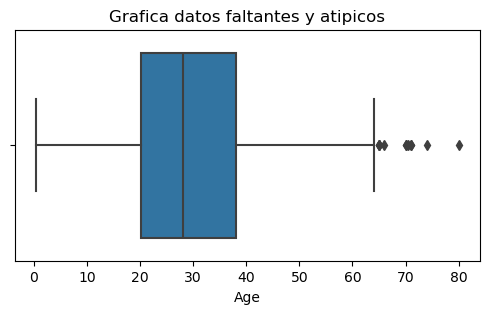

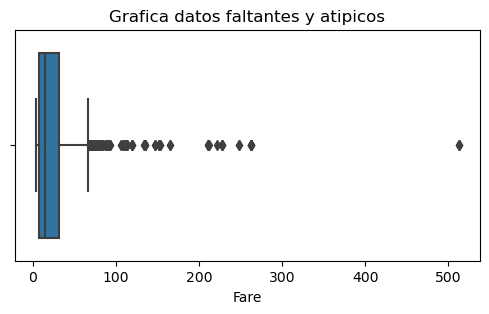

In [90]:
#Grafica de datos faltantes y atipicos en Age
plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['Age'])
plt.title('Grafica datos faltantes y atipicos', fontsize=12)

#Grafica de datos faltantes y atipicos en Fare
plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['Fare'])
plt.title('Grafica datos faltantes y atipicos', fontsize=12)

In [93]:

#Rango datos atipicos
Nivel_minimo=1
Nivel_maximo=100
Total_atipicos=((Dataset['Age']<Nivel_minimo)|(Dataset['Age']>Nivel_maximo)).sum()
print("El total de datos atipicos en Age es: {}".format(Total_atipicos))

#Rango datos atipicos
Nivel_minimo=7
Nivel_maximo=100000
Total_atipicos=((Dataset['Fare']<Nivel_minimo)|(Dataset['Fare']>Nivel_maximo)).sum()
print("El total de datos atipicos en Fare es: {}".format(Total_atipicos))

El total de datos atipicos en Age es: 7
El total de datos atipicos en Fare es: 13


In [95]:
#Total personas Survived
Dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [96]:
#Paso 4 : Dividir el dataset en Train y test

In [101]:
#Creacion de variables X y Y para almacenar la informacion
X = Dataset.drop('Survived',axis=1) #Datos sin columna condicion
Y = Dataset['Survived'] #Datos de la columna condicion

#Asignacion de 80% Train y 20% Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=0)

In [102]:
#Datos sin columna 	Survived
print (X_train)

     PassengerId  Pclass                                  Name     Sex   Age  \
502          503       3        O'Sullivan, Miss. Bridget Mary  female   NaN   
464          465       3                    Maisner, Mr. Simon    male   NaN   
198          199       3      Madigan, Miss. Margaret "Maggie"  female   NaN   
765          766       1  Hogeboom, Mrs. John C (Anna Andrews)  female  51.0   
421          422       3                   Charters, Mr. David    male  21.0   
..           ...     ...                                   ...     ...   ...   
131          132       3        Coelho, Mr. Domingos Fernandeo    male  20.0   
490          491       3  Hagland, Mr. Konrad Mathias Reiersen    male   NaN   
528          529       3             Salonen, Mr. Johan Werner    male  39.0   
48            49       3                   Samaan, Mr. Youssef    male   NaN   
80            81       3                  Waelens, Mr. Achille    male  22.0   

     SibSp  Parch              Ticket  

In [109]:
#Datos columna Survived
print (Y_train)

502    0
464    0
198    1
765    1
421    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 712, dtype: int64


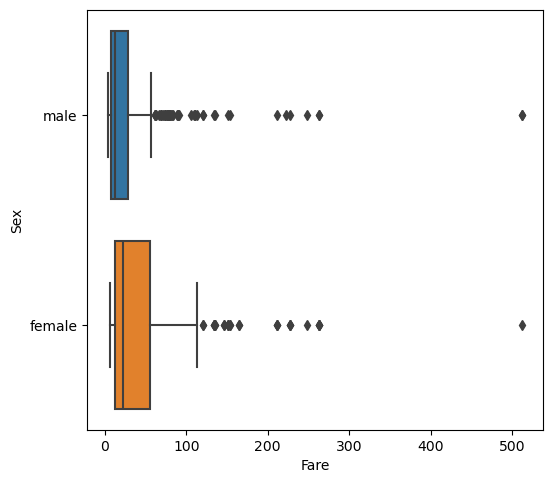

In [132]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Fare', y = 'Sex', data = Dataset)
plt.show()

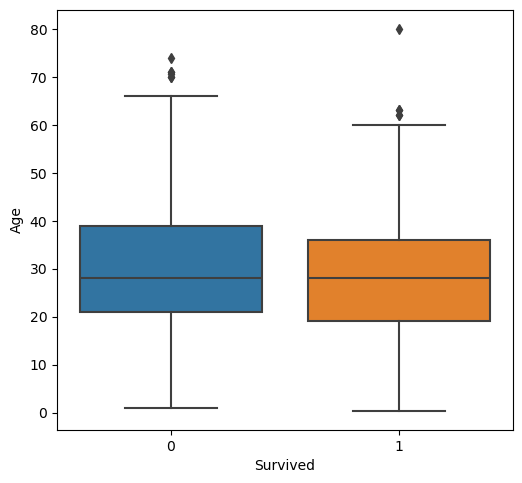

In [133]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Survived', y = 'Age', data = Dataset)
plt.show()

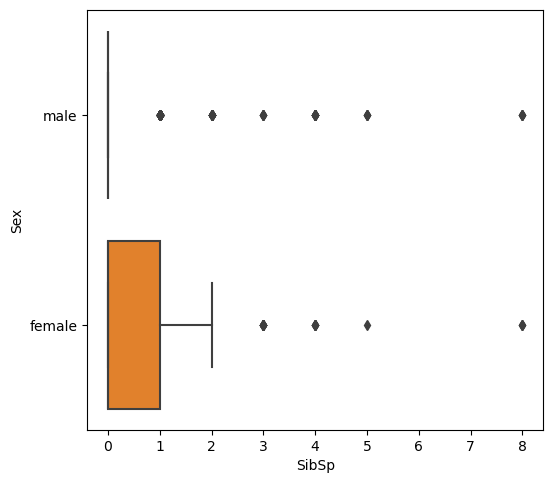

In [136]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'SibSp', y = 'Sex', data = Dataset)
plt.show()

C:\Users\carlo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\carlo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\carlo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\carlo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

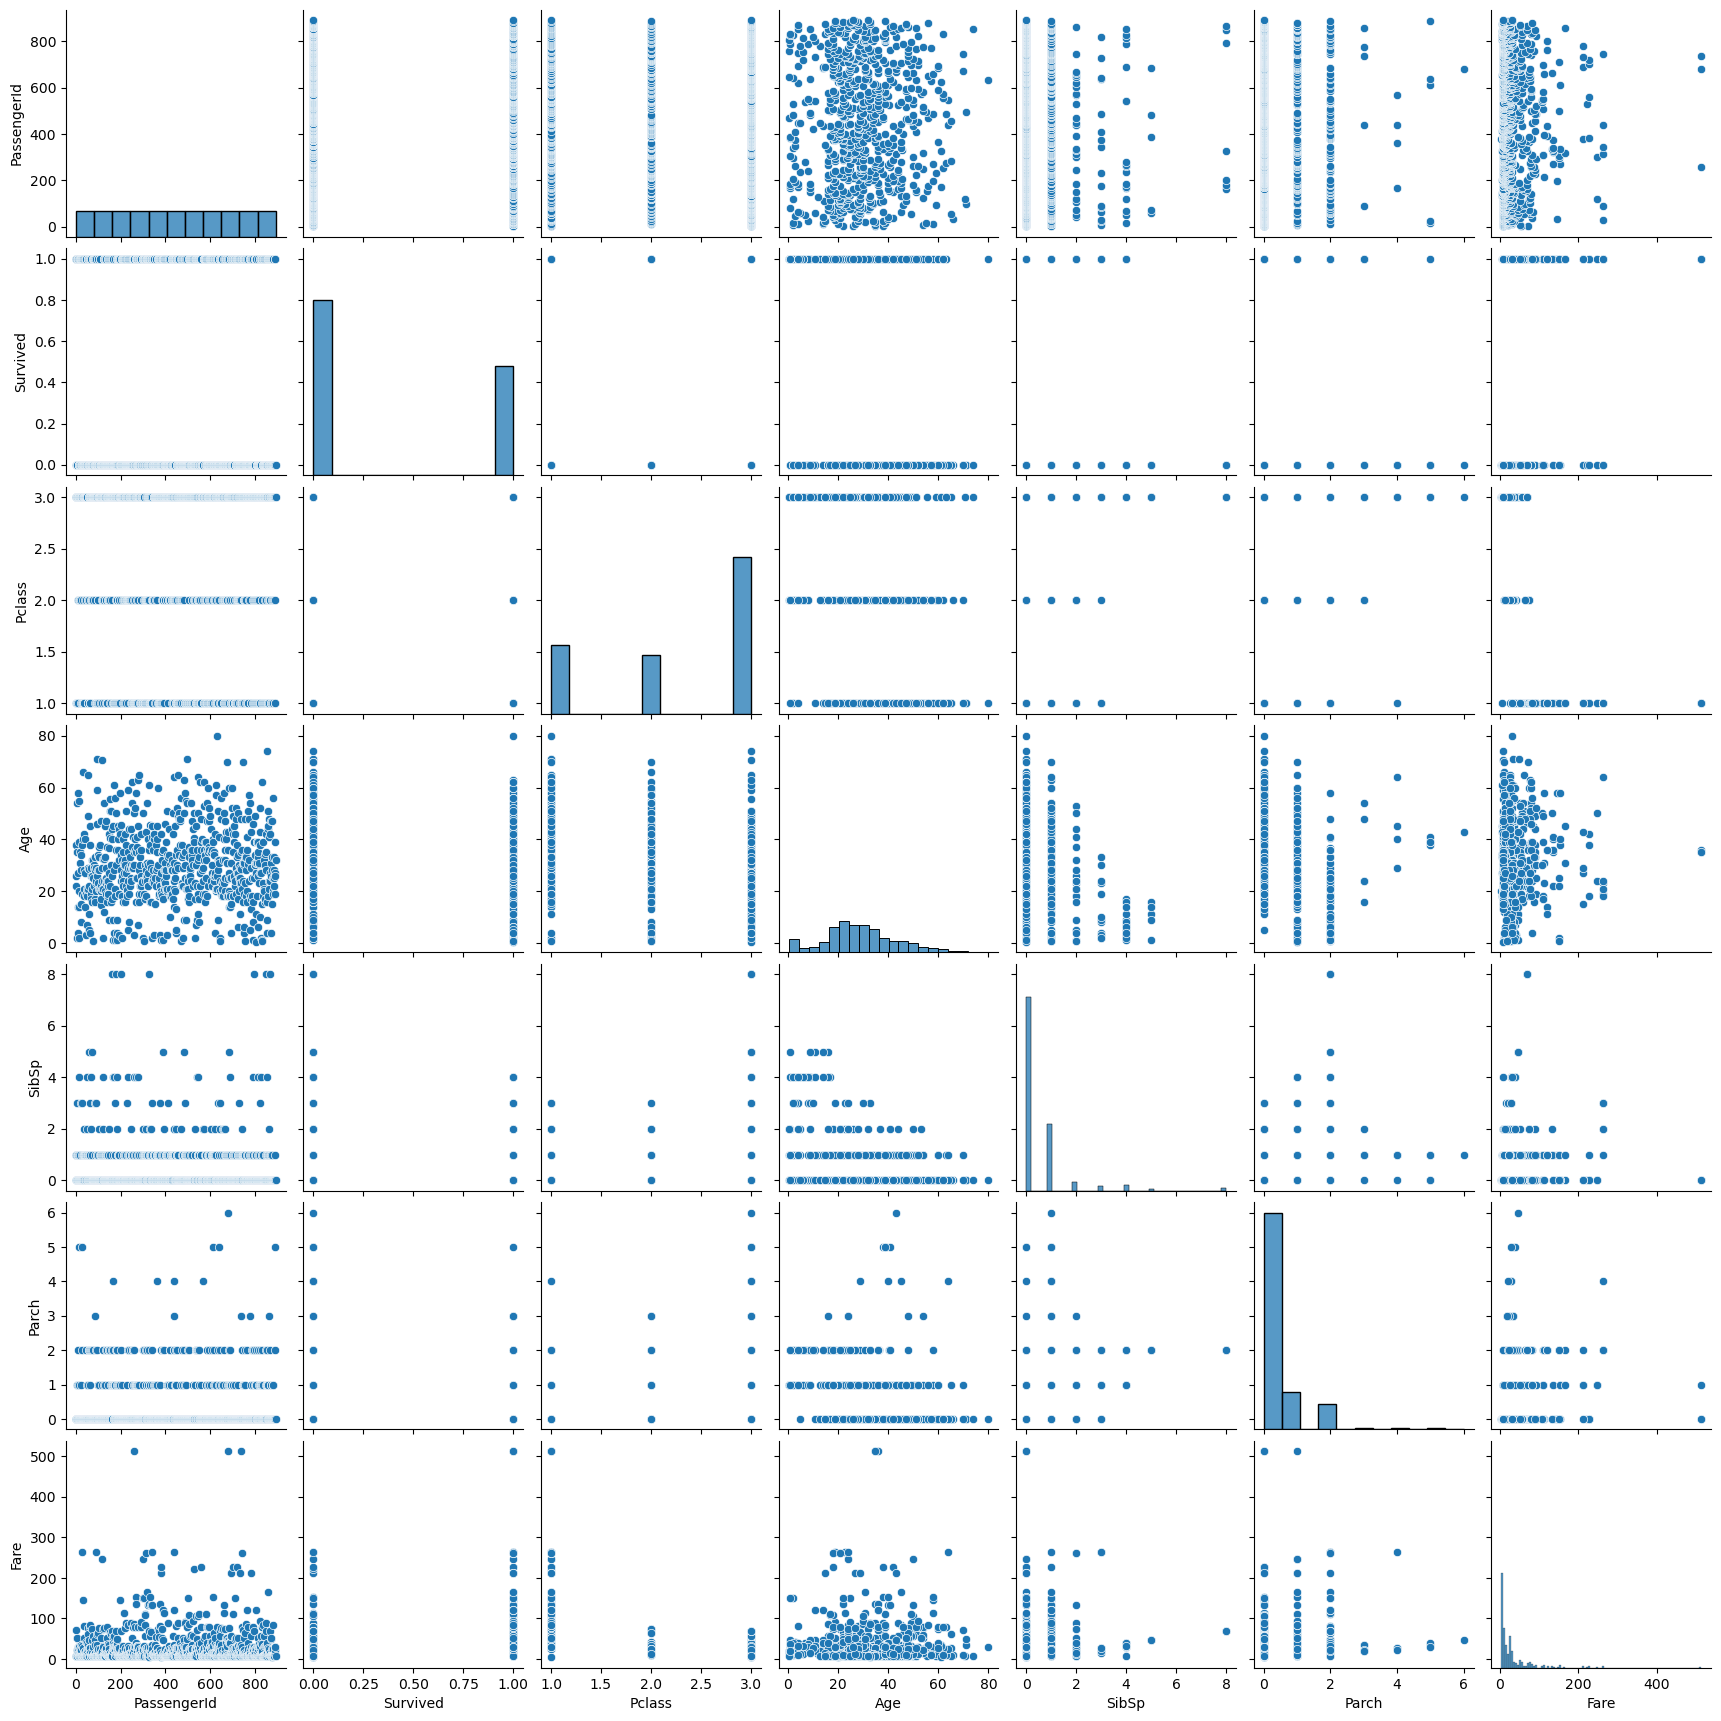

In [138]:
sns.pairplot(Dataset)
plt.show()